### Import libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\Treeb\Instacart Basket Analysis 11-20-2023'

### Import Merged Dataset

In [4]:
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_flags.pkl'))

In [5]:
df_ords_prods_merge.shape

(32404859, 24)

In [6]:
df_ords_prods_merge.head()

order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2398795        1             2                   3                  7   
2    473747        1             3                   3                 12   
3   2254736        1             4                   4                  7   
4    431534        1             5                   4                 15   

   days_since_users_last_order  product_id  add_to_cart_order  reordered  \
0                          NaN         196                  1          0   
1                         15.0         196                  1          1   
2                         21.0         196                  1          1   
3                         29.0         196                  1          1   
4                         28.0         196                  1          1   

  _merge  ...    price_range_loc     busiest_day    busiest_days  \
0   both  ...  Mid-range product  Regularly busy  Regularly busy   
1   both  ...  Mid-range product  Regularly busy        Slow day   
2   both  ...  Mid-range product  Regularly busy        Slow day   
3   both  ...  Mid-range product      Least busy        Slow day   
4   both  ...  Mid-range product      Least busy        Slow day   

   busiest_period_of_day max_order  loyalty_flag average_purchase_price  \
0         Average orders        10  New customer               6.367797   
1         Average orders        10  New customer               6.367797   
2            Most orders        10  New customer               6.367797   
3         Average orders        10  New customer               6.367797   
4            Most orders        10  New customer               6.367797   

  spending_flag  median_days_between_orders         frequency_flag  
0   Low Spender                        20.5  Non-Frequent customer  
1   Low Spender                        20.5  Non-Frequent customer  
2   Low Spender                        20.5  Non-Frequent customer  
3   Low Spender                        20.5  Non-Frequent customer  
4   Low Spender                        20.5  Non-Frequent customer  

[5 rows x 24 columns]

### Bar Charts

#### Automatically sorts by value

<AxesSubplot:>

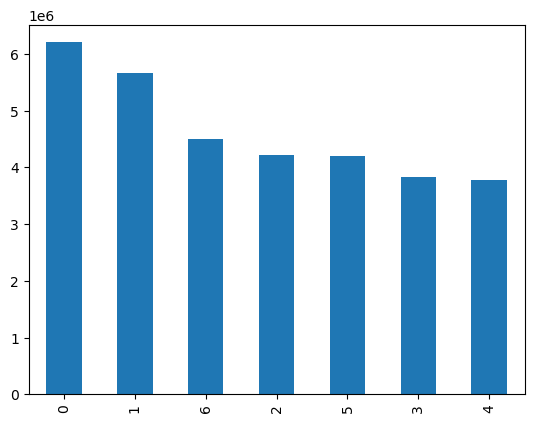

In [7]:
# pandas has access to matplotlib
df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

#### .sort_index() to Sort by Index

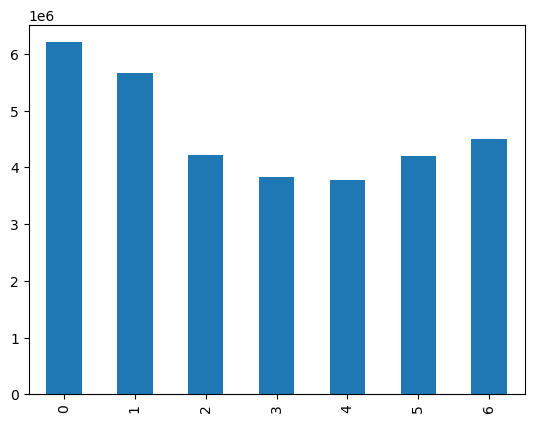

In [7]:
# don't automatically sort bars largest to smallest with .sort_index()
# sorts by index order instead
bar = df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [8]:
df_ords_prods_merge['orders_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [9]:
df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

#### Add Colors to Bar Charts

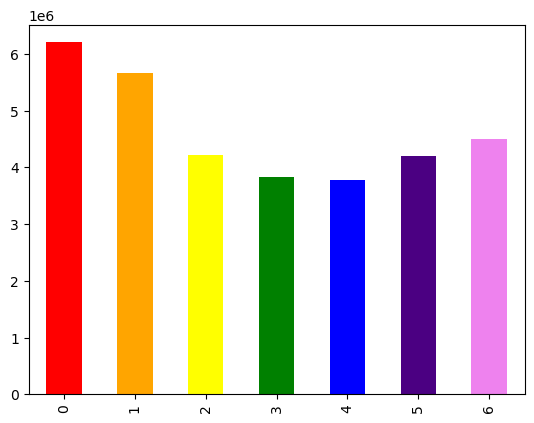

In [10]:
bar = df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])

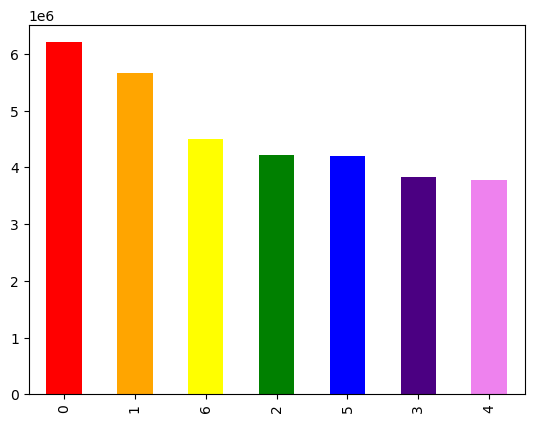

In [12]:
bar = df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])

#### Export Bar Chart

In [11]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### Histograms

<AxesSubplot:ylabel='Frequency'>

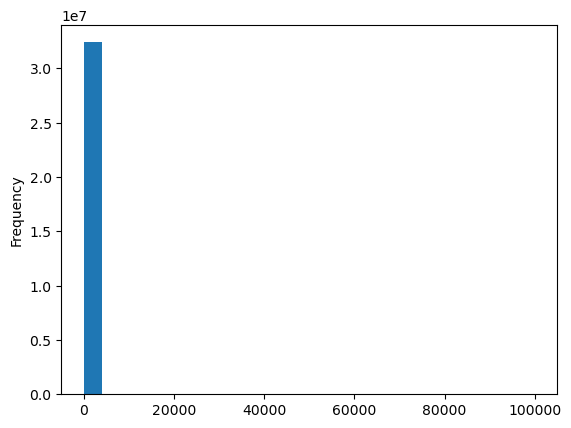

In [12]:
df_ords_prods_merge['prices'].plot.hist(bins = 25)

One bar showing in the histogram. Use .describe() function to figure out what's going on.

In [13]:
df_ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

The max value is much higher than all the other values. 

In [14]:
df_ords_prods_merge['prices'].max()

99999.0

In [15]:
df_ords_prods_merge['prices'].mean()

11.980225638467232

In [16]:
df_ords_prods_merge['prices'].median()

7.4

<AxesSubplot:xlabel='prices', ylabel='prices'>

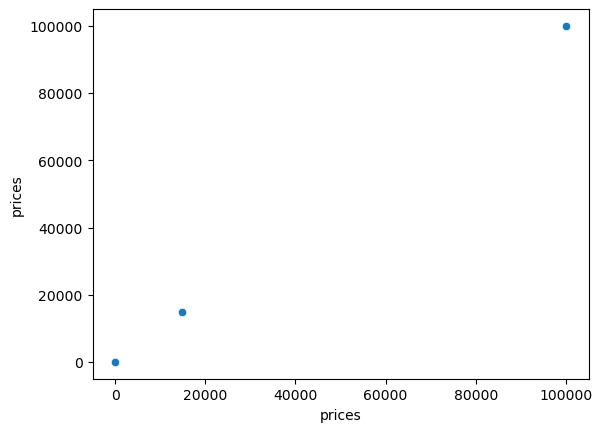

In [17]:
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merge)

#### Subset all the products with prices over 100 usd to investigate further

In [18]:
df_expensive_products = df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100]

In [19]:
df_expensive_products

order_id  user_id  order_number  orders_day_of_week  \
10030345    912404       17            12                   2   
10030346    603376       17            22                   6   
10030347   3264360      135             2                   2   
10030348    892534      135             3                   0   
10030349    229704      342             8                   1   
...            ...      ...           ...                 ...   
29166209   2249946   204099            29                   0   
29166210   2363282   204099            31                   0   
29166211   3181945   204395            13                   3   
29166212   2486215   205227             7                   3   
29166213   2232716   205227            10                   0   

          order_hour_of_day  days_since_users_last_order  product_id  \
10030345                 14                          5.0       21553   
10030346                 16                          4.0       21553   
10030347                 21                         13.0       21553   
10030348                  8                         12.0       21553   
10030349                 19                         30.0       21553   
...                     ...                          ...         ...   
29166209                  8                          4.0       33664   
29166210                  9                          2.0       33664   
29166211                 15                          8.0       33664   
29166212                 20                          4.0       33664   
29166213                 11                          4.0       33664   

          add_to_cart_order  reordered _merge  ...     price_range_loc  \
10030345                  5          0   both  ...  High-range product   
10030346                  3          1   both  ...  High-range product   
10030347                  6          0   both  ...  High-range product   
10030348                  3          1   both  ...  High-range product   
10030349                  9          0   both  ...  High-range product   
...                     ...        ...    ...  ...                 ...   
29166209                  1          0   both  ...  High-range product   
29166210                  1          1   both  ...  High-range product   
29166211                 25          0   both  ...  High-range product   
29166212                  8          0   both  ...  High-range product   
29166213                 23          1   both  ...  High-range product   

             busiest_day    busiest_days  busiest_period_of_day max_order  \
10030345  Regularly busy  Regularly busy            Most orders        40   
10030346  Regularly busy  Regularly busy            Most orders        40   
10030347  Regularly busy  Regularly busy         Average orders         4   
10030348     Busiest day        Busy day         Average orders         4   
10030349  Regularly busy        Busy day         Average orders        16   
...                  ...             ...                    ...       ...   
29166209     Busiest day        Busy day         Average orders        39   
29166210     Busiest day        Busy day            Most orders        39   
29166211  Regularly busy        Slow day            Most orders        15   
29166212  Regularly busy        Slow day         Average orders        12   
29166213     Busiest day        Busy day            Most orders        12   

              loyalty_flag average_purchase_price spending_flag  \
10030345  Regular customer             108.648299  High Spender   
10030346  Regular customer             108.648299  High Spender   
10030347      New customer            1154.792308  High Spender   
10030348      New customer            1154.792308  High Spender   
10030349  Regular customer             114.426619  High Spender   
...                    ...                    ...           ...   
29166209  Regular customer            1106.743956  High Spender   
29166210  Regu

In [21]:
df_expensive_products['prices'].describe()

count     5127.000000
mean     26485.547494
std      29186.636448
min      14900.000000
25%      14900.000000
50%      14900.000000
75%      14900.000000
max      99999.000000
Name: prices, dtype: float64

In [24]:
df_expensive_products[['product_name', 'prices']]

product_name   prices
10030345  Lowfat 2% Milkfat Cottage Cheese  14900.0
10030346  Lowfat 2% Milkfat Cottage Cheese  14900.0
10030347  Lowfat 2% Milkfat Cottage Cheese  14900.0
10030348  Lowfat 2% Milkfat Cottage Cheese  14900.0
10030349  Lowfat 2% Milkfat Cottage Cheese  14900.0
...                                    ...      ...
29166209             2 % Reduced Fat  Milk  99999.0
29166210             2 % Reduced Fat  Milk  99999.0
29166211             2 % Reduced Fat  Milk  99999.0
29166212             2 % Reduced Fat  Milk  99999.0
29166213             2 % Reduced Fat  Milk  99999.0

[5127 rows x 2 columns]

Product names for expensive products with prices of 14,900  and  99,999 usd are for products like cottage cheese and milk. Very likely that is a mistake.

#### Replace all prices over 100 usd with nan

In [25]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] >100, 'prices'] = np.nan

Check with .max() function that above function had desired effect on dataframe.

In [26]:
df_ords_prods_merge['prices'].max()

25.0

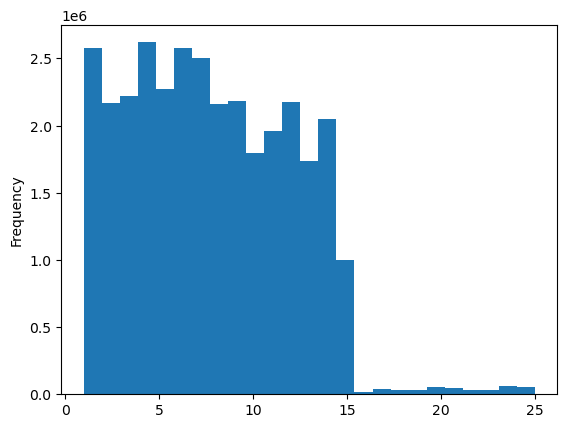

In [25]:
hist = df_ords_prods_merge['prices'].plot.hist(bins = 25)

Increase number of bins to make frequency columns skinnier. 

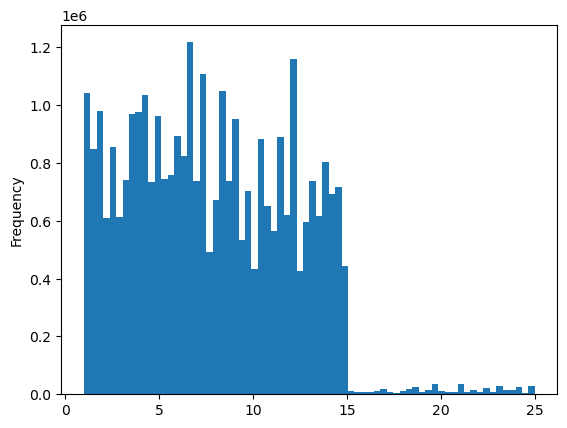

In [26]:
hist_2 = df_ords_prods_merge['prices'].plot.hist(bins = 70)

In [28]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_frequency.png'))

In [29]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_freq_wide.png'))

### Make a randomized sample to not overload computer

np.random.rand() comes up with random numbers between 0 and 1. Specify the number of random numbers you want in the parantheses.

In [34]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

To split the dataframe into randomized samples, you need to: 

1.) Set the seed for the random number generator.

2.) Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.

3.) Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).

4.) Store the results of the test in a new list, dev, in the form of boolean values (True and False).

In [35]:
# set the seed. Good for duplicating this process later. Will get the same set of random numbers if use the same seed number.
np.random.seed(4)
# create a logical test to make everything into boolean true/false values
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7

In [36]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [37]:
# contains 70% of random rows in the original dataframe
big = df_ords_prods_merge[dev]

In [38]:
# contains 30% of random rows
small = df_ords_prods_merge[~dev]

In [39]:
len(df_ords_prods_merge)

32404859

In [40]:
len(big) + len(small)

32404859

In [41]:
df_2 = small[['orders_day_of_week','prices']]

### Line Plot

Use df_2, which has a random sample of 30% of the data, to create a line plot. If we used 100% of the data, it is likely to crash because the dataset is so big. 

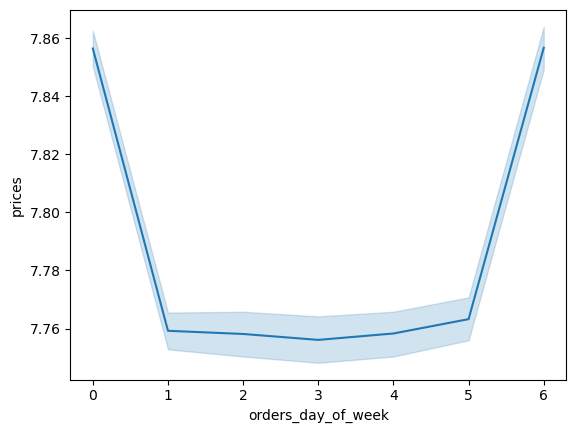

In [42]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

Translucent blue bands around my line are called "error bands". Represents confidence interval. Here, it is about 95%. 

Normally, it would be good to compare this sample result with a line chart formed from the whole dataset. However, it takes a lot of computing power and my computer is a little full, so I will skip that step. 

#### Export Line Chart

In [43]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_vs_dow.png'))